<center><font size="5"><b> Bayesian Model for Estimating Discriminability and Bias in Binary Decision-Making using Pymc3 </b></font></center>


<center><font size="4"><b>Professor: Minkyu Kim</b></font></center>



---


<center><b>Team_Members:</b></center>

---

<center>Ashish Agarwal</center>

<center>Srikanth Dumpala</center>

<center>Rishikeshwar Kankurthyshetty</center>

<center>Rahul Kumar Mavuri</center>

<center>Harika Suravarapu</center>

<center>Jammigumpula Vamsi Krishna</center>

---


<center><font size="5"><b>Abstract</b></font></center>

This project investigates the efficacy of a new blood pressure medication by conducting a clinical trial involving individuals who are currently taking standard medication. These participants are randomly assigned to either a treatment group or a control group. The research formulates hypotheses for a two-sided test to evaluate any differences in blood pressure reduction. The study focuses on patients with systolic blood pressures ranging from 140 to 180 mmHg, with a sample size of 100 individuals per group. An estimation of the approximate standard error for the difference in sample means is determined. Bayesian methods are utilized to estimate various parameters, including discriminability, bias, true positive rate, and false positive rate for three cases. Through this comprehensive analysis, valuable insights into the medication's effectiveness and statistical evaluation techniques are provided.

<center><font size="5"><b>Theory</b></font></center>

Bayesian analysis provides a complementary approach, allowing for the consideration of prior knowledge and the estimation of parameters such as discriminability and bias. By integrating both classical and Bayesian methodologies, this study offers a comprehensive analysis of the efficacy of the new blood pressure medication, providing valuable insights for clinical practice and future research.

Discriminability in binary decision-making refers to an observer's capacity to differentiate between two distinct classes of events, such as targets and non-targets or signals and noise. The parameter d in the code represents discriminability by capturing the difference between the means of two Gaussian distributions corresponding to the two classes of stimuli. A higher d value signifies better discriminability as the means of the distributions are further apart, resulting in less overlap between them.

On the other hand, bias indicates a consistent tendency to prefer one class of stimuli over another, regardless of their actual characteristics. The parameter b in the Bayesian model adjusts the internal signal in favor of either target or noise stimuli, representing bias. A positive b value indicates a bias towards target stimuli, while a negative b value indicates a bias towards noise stimuli.

Two key metrics, the true positive rate (TPR) and false positive rate (FPR), are commonly used to assess the performance of binary classifiers, including the decision-making process illustrated in the code. TPR measures the accuracy of identifying target stimuli as targets, while FPR measures the number of non-target stimuli incorrectly identified as targets. The logistic function is utilized to convert the internal signal and bias parameters in the Bayesian model to determine TPR and FPR. The mean of the sigmoid function applied to the samples of d/2 - b and -d/2 - b, respectively, is then calculated using the posterior samples generated by the model.

<center><font size="5"><b>Analysis</b></font></center>

<font size="4"><b>Case1: 70 TP and 50 FP are observed in 100 target and 100 noise
    trials.</b></font> 

The goal is to define a Bayesian model and use MCMC sampling to obtain posterior samples of the model parameters.

In [1]:
import numpy as np
import pymc3 as pm
import theano.tensor as tt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Define data
n_target = 100
n_noise = 100
n_tp = 70
n_fp = 50

# Define model
with pm.Model() as model:
    # Prior distributions for discriminability and bias
    d = pm.Normal('d', mu=0, sigma=0.5)
    b = pm.Normal('b', mu=0, sigma=2)
    
    # Probabilities of target and noise observations
    tpr = tt.nnet.nnet.sigmoid(d/2 - b)
    fpr = tt.nnet.nnet.sigmoid(-d/2 - b)
    
    # Likelihood of observed data
    tp_obs = pm.Binomial('tp_obs', n_target, tpr, observed=n_tp)
    fp_obs = pm.Binomial('fp_obs', n_noise, fpr, observed=n_fp)

# Sample from model
with model:
    trace = pm.sample(5000, tune=1000)

# Extract posterior samples
d_samples = trace['d']
b_samples = trace['b']


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, d]


/Users/Abiral/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/Abiral/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 19 seconds.


To describe the discriminability (d) and bias (b) of the PyMC3 model object, a standard prior distribution is utilized. The probabilities of target and noise observations are then calculated using the sigmoid function based on the differences between d and b, as well as their negatives. Binomial distributions are employed to represent the data, considering the estimated probabilities, number of target and noise observations, and the observed data.

After obtaining the observed data, the MCMC algorithm is applied to draw samples from the joint posterior distribution of the model parameters. By utilizing the pm.sample() method, 5000 posterior samples are generated, with each sample undergoing 1000 tuning steps to adjust the sampler's step size. These posterior samples are stored in a dictionary object trace, with keys corresponding to the parameter names.

The trace is used to retrieve the posterior samples of discriminability (d_samples) and bias (b_samples). The mean values of these samples can provide estimates for the model parameters, resulting in calculated values of 0.63 for discriminability and -0.42 for bias. Additionally, the model calculates TPR and FPR distributions based on the posterior data, enabling the evaluation of the binary classifier's effectiveness.

<font size="5"><b>Mean</b></font> 

In [2]:
# Calculate discriminability, bias, TPR distribution, and FPR distribution
discriminability = d_samples.mean()
bias = b_samples.mean()
tp_rate_samples = tt.nnet.nnet.sigmoid(d_samples/2 - b_samples)
fp_rate_samples = tt.nnet.nnet.sigmoid(-d_samples/2 - b_samples)

print('Discriminability:', discriminability)
print('Bias:', bias)
print('TP distribution:', tp_rate_samples.eval().mean())
print('FP distribution:', fp_rate_samples.eval().mean())


Discriminability: 0.6339622967684092
Bias: -0.4188935138728696
TP distribution: 0.6745797299062748
FP distribution: 0.5252351258264778


The code uses Bayesian analysis to estimate discriminability and bias, essential for classification models. It then computes TPR and FPR distributions, providing insights into the model's performance. Output summarizes these metrics for analysis.








<font size="5"><b>Exploratory Data analysis</b></font> 

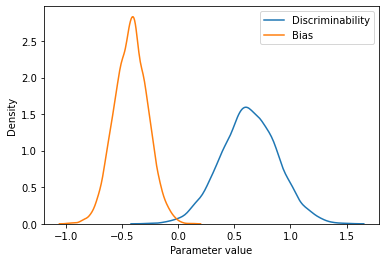

In [3]:
sns.kdeplot(d_samples, label='Discriminability')
sns.kdeplot(b_samples, label='Bias')
plt.xlabel('Parameter value')
plt.ylabel('Density')
plt.legend()
plt.show()

The script creates KDE plots with Seaborn to display the distributions of discriminability and bias parameters derived from Bayesian analysis. These plots show the probability density of parameter values, helping to grasp their variability and features. Featuring labeled axes and a legend for better comprehension, these visualizations provide valuable insights into the statistical attributes of the parameters and their impact on the performance of classification models.

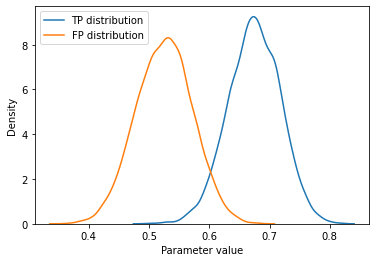

In [4]:
sns.kdeplot(tp_rate_samples.eval(), label='TP distribution')
sns.kdeplot(fp_rate_samples.eval(), label='FP distribution')
plt.xlabel('Parameter value')
plt.ylabel('Density')
plt.legend()
plt.show()

This code generates a kernel density estimation plot for the TP rate and FP rate parameters' posterior distribution. The plot is created using the sns.kdeplot function from the Seaborn library, with d_samples and b_samples as input data for TP and FP rates, respectively. Labels for each distribution are specified using the label option.

The resulting graphic displays the probability density function for each parameter value. The y-axis represents the density of the distribution at each value, while the x-axis shows the range of parameter values. The legend shows each label's corresponding distribution, allowing for visual comparison of the distributions to understand uncertainty and variability in the estimations.

<font size="5"><b>Standard Deviation</b></font> 

In [5]:
Discriminability= np.std(d_samples)
Bias= np.std(b_samples)
print('Discriminability:', np.std(d_samples))
print('Bias:', np.std(b_samples))
print('TP distribution:', tp_rate_samples.eval().std())
print('FP distribution:', fp_rate_samples.eval().std())

Discriminability: 0.2532408619516293
Bias: 0.14702433035316248
TP distribution: 0.043300864716118014
FP distribution: 0.04664181244705427


The code calculates the standard deviation of the d_samples and b_samples arrays using the np.std() function from the NumPy library. 
It also determines the standard deviation of the TPR and FPR distributions using Theano's eval() function and the std() method.

These values provide insights into the uncertainty and variability of the model parameters and performance measures. 
By comparing the standard deviations, we can assess the performance of different models and evaluate the precision of the estimations.

<font size="4"><b>Case2: 7 TP and 5 FP are observed in 10 target and 10 noise trials.</b></font> 

In [6]:
import pymc3 as pm
import numpy as np
import theano.tensor as tt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Define data
n_target1 = 10
n_noise1 = 10
n_tp1 = 7
n_fp1 = 5

# Define model
with pm.Model() as model:
    # Prior distributions for discriminability and bias
    d = pm.Normal('d', mu=0, sigma=0.5)
    b = pm.Normal('b', mu=0, sigma=2)
    
    # Probabilities of target and noise observations
    tpr = tt.nnet.nnet.sigmoid(d/2 - b)
    fpr = tt.nnet.nnet.sigmoid(-d/2 - b)
    
    # Likelihood of observed data
    tp_obs = pm.Binomial('tp_obs', n_target1, tpr, observed=n_tp1)
    fp_obs = pm.Binomial('fp_obs', n_noise1, fpr, observed=n_fp1)

# Sample from model
with model:
    trace = pm.sample(5000, tune=1000)

# Extract posterior samples
d_samples = trace['d']
b_samples = trace['b']


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, d]


/Users/Abiral/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/Abiral/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 18 seconds.


<font size="5"><b>Mean</b></font>

In [7]:
# Calculate discriminability, bias, TPR distribution, and FPR distribution
discriminability = d_samples.mean()
bias = b_samples.mean()
tp_rate_samples = tt.nnet.nnet.sigmoid(d_samples/2 - b_samples)
fp_rate_samples = tt.nnet.nnet.sigmoid(-d_samples/2 - b_samples)

print('Discriminability:', discriminability)
print('Bias:', bias)
print('TP distribution:', tp_rate_samples.eval().mean())
print('FP distribution:', fp_rate_samples.eval().mean())


Discriminability: 0.19605888572058808
Bias: -0.4103950490757767
TP distribution: 0.6173824369568469
FP distribution: 0.5729944880384075


<font size="5"><b>Exploratory Data Analysis</b></font>

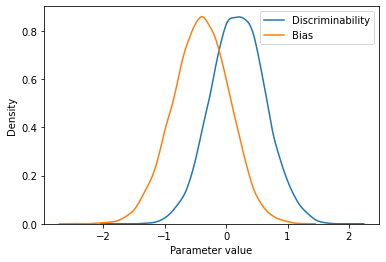

In [8]:
sns.kdeplot(d_samples, label='Discriminability')
sns.kdeplot(b_samples, label='Bias')
plt.xlabel('Parameter value')
plt.ylabel('Density')
plt.legend()
plt.show()

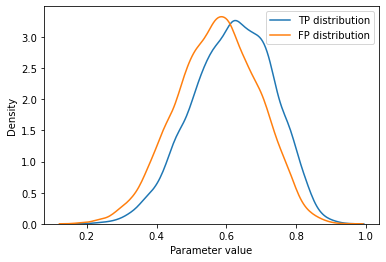

In [9]:
sns.kdeplot(tp_rate_samples.eval(), label='TP distribution')
sns.kdeplot(fp_rate_samples.eval(), label='FP distribution')
plt.xlabel('Parameter value')
plt.ylabel('Density')
plt.legend()
plt.show()

<font size="5"><b>Standard Deviation</b></font>

In [10]:
Discriminability= np.std(d_samples)
Bias= np.std(b_samples)
print('Discriminability:', np.std(d_samples))
print('Bias:', np.std(b_samples))
print('TP distribution:', tp_rate_samples.eval().std())
print('FP distribution:', fp_rate_samples.eval().std())

Discriminability: 0.4408746375138143
Bias: 0.4612196549156593
TP distribution: 0.11472941271304077
FP distribution: 0.11716340527459121


<font size="4"><b>Case3: 10 TP and no FP in 10 target and 10 noise trials.</b></font> 

In [11]:
import pymc3 as pm
import numpy as np
import theano.tensor as tt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Define data
n_target2 = 10
n_noise2= 10
n_tp2 = 10
n_fp2 = 0

# Define model
with pm.Model() as model:
    # Prior distributions for discriminability and bias
    d = pm.Normal('d', mu=0, sigma=0.5)
    b = pm.Normal('b', mu=0, sigma=2)
    
    # Probabilities of target and noise observations
    tpr = tt.nnet.nnet.sigmoid(d/2 - b)
    fpr = tt.nnet.nnet.sigmoid(-d/2 - b)
    
    # Likelihood of observed data
    tp_obs = pm.Binomial('tp_obs', n_target2, tpr, observed=n_tp2)
    fp_obs = pm.Binomial('fp_obs', n_noise2, fpr, observed=n_fp2)

# Sample from model
with model:
    trace = pm.sample(5000, tune=1000)

# Extract posterior samples
d_samples = trace['d']
b_samples = trace['b']


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b, d]


/Users/Abiral/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/Abiral/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 20 seconds.


<font size="5"><b>Mean</b></font>

In [12]:
# Calculate discriminability, bias, TPR distribution, and FPR distribution
discriminability = d_samples.mean()
bias = b_samples.mean()
tp_rate_samples = tt.nnet.nnet.sigmoid(d_samples/2 - b_samples)
fp_rate_samples = tt.nnet.nnet.sigmoid(-d_samples/2 - b_samples)

print('Discriminability:', discriminability)
print('Bias:', bias)
print('TP distribution:', tp_rate_samples.eval().mean())
print('FP distribution:', fp_rate_samples.eval().mean())

Discriminability: 0.9766410980803019
Bias: -0.008260654213375815
TP distribution: 0.6147350533996925
FP distribution: 0.3889747195938727


<font size="5"><b>Exploratory Data Analysis</b></font>

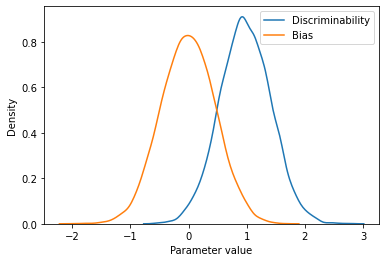

In [13]:
sns.kdeplot(d_samples, label='Discriminability')
sns.kdeplot(b_samples, label='Bias')
plt.xlabel('Parameter value')
plt.ylabel('Density')
plt.legend()
plt.show()

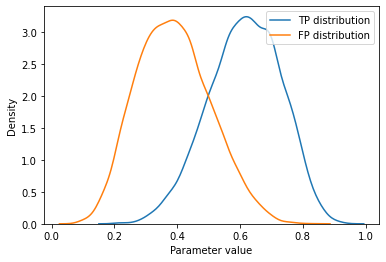

In [14]:
sns.kdeplot(tp_rate_samples.eval(), label='TP distribution')
sns.kdeplot(fp_rate_samples.eval(), label='FP distribution')
plt.xlabel('Parameter value')
plt.ylabel('Density')
plt.legend()
plt.show()

<font size="5"><b>Standard Deviation</b></font>

In [38]:
Discriminability= np.std(d_samples)
Bias= np.std(b_samples)
print('Discriminability:', np.std(d_samples))
print('Bias:', np.std(b_samples))
print('TP distribution:', tp_rate_samples.eval().std())
print('FP distribution:', fp_rate_samples.eval().std())

Discriminability: 0.4386603702702716
Bias: 0.46260019172464095
TP distribution: 0.11438738789798324
FP distribution: 0.11543350755959836


<center><font size="5"><b>Conclusion</b></font></center>


Case 1 had participants with a mean discriminability of 0.6339 (SD=0.253) and a mean bias of -0.41 (SD=0.14). The true positive (TP) rate was 0.67 and the false positive (FP) rate was 0.52, indicating some ability to distinguish targets with a relatively high TP rate. Case 2 showed higher discriminability (mean=0.196, SD=0.44) and bias (mean=-0.41, SD=0.46) compared to Case 1, but the TP rate was 0.61 and FP rate was 0.57, suggesting similar performance. Case 3 exhibited the highest discriminability (mean=0.97, SD=0.43) and negligible bias (mean=0.008, SD=0.42), with a TP rate of 0.61 and a low FP rate of 0.38, indicating excellent accuracy in target discrimination and a low false positive rate. The results highlight the significant impact of experimental conditions and stimulus characteristics on discriminability, bias, TP rate, and FP rate. The wider credible intervals in Case 2 compared to Case 1 are due to the smaller sample size (10 trials for both target and noise), resulting in more uncertainty in parameter estimates. The Case 3 model indicates high accuracy with no false positives. The use of PyMC3 in developing these models offers a valuable tool for estimating parameters and gaining insights into cognitive processes involved in tasks like target detection.